## Import Libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import norm,t
import statistics
import seaborn as sns
import scipy.stats as stats

## Data

In [23]:
data=pd.read_csv("D:\Dataset/SOCR-HeightWeight.csv")

In [24]:
data

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


## Find Mean and standard deviation

In [25]:
mean=np.mean(data)
mean

Index             12500.500000
Height(Inches)       67.993114
Weight(Pounds)      127.079421
dtype: float64

In [26]:
std_dev=np.std(data)
std_dev

Index             7216.878359
Height(Inches)       1.901641
Weight(Pounds)      11.660664
dtype: float64

## Draw sample of size n

In [27]:
sample_size=14
sample=np.random.normal(data,sample_size)
sample

array([[9.01321122e+00, 4.73683972e+01, 1.12987020e+02],
       [7.98195299e+00, 6.31044553e+01, 1.23236673e+02],
       [1.62527855e+01, 6.38584660e+01, 1.57566968e+02],
       ...,
       [2.49999542e+04, 5.47937707e+01, 1.14427165e+02],
       [2.50046311e+04, 6.81378595e+01, 1.13140822e+02],
       [2.50018189e+04, 7.52871182e+01, 1.34548020e+02]])

## Confidence interval when standard deviation is known

In [28]:
confidence_interval=0.99
z_score=norm.ppf((1+confidence_interval)/2)
margin_of_error=z_score*(std_dev/np.sqrt(sample_size))
ci_lower=mean-margin_of_error
ci_upper=mean+margin_of_error
print("confidence interval when standard deviation is known: ",ci_lower, "-", ci_upper )

confidence interval when standard deviation is known:  Index             7532.261373
Height(Inches)      66.683987
Weight(Pounds)     119.051994
dtype: float64 - Index             17468.738627
Height(Inches)       69.302240
Weight(Pounds)      135.106848
dtype: float64


## Confidence interval when standard deviation is unknown

In [30]:

# Degrees of freedom
degrees_of_freedom = sample_size - 1

# Confidence interval 
confidence_level = 0.95

# T-score for the confidence level and degrees of freedom
t_score = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)

# Sample standard deviation
sample_std_dev = np.std(data, ddof=1)

# Margin of error
margin_of_error = t_score * (sample_std_dev / np.sqrt(sample_size))

# Confidence interval bounds
ci_lower = mean - margin_of_error
ci_upper = mean + margin_of_error

print("Confidence interval when standard deviation is unknown:")
print("Lower bound:", ci_lower)
print("Upper bound:", ci_upper)


Confidence interval when standard deviation is unknown:
Lower bound: Index             8333.515152
Height(Inches)      66.895117
Weight(Pounds)     120.346619
dtype: float64
Upper bound: Index             16667.484848
Height(Inches)       69.091110
Weight(Pounds)      133.812223
dtype: float64


## Boxplot

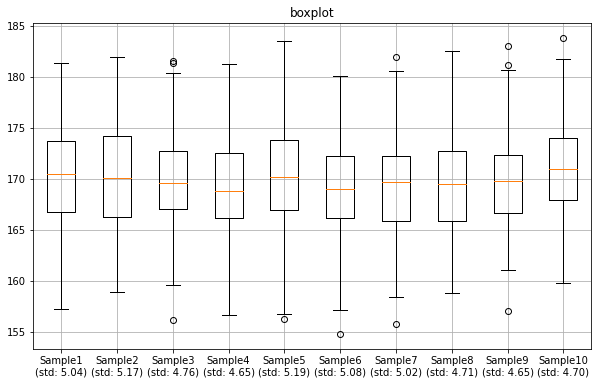

In [35]:
np.random.seed(0)
no_of_samples=10
sample_size=100
data=np.random.normal(loc=170,scale=5,size=(no_of_samples, sample_size))

#calculate standard deviations for each sample
std_deviations=np.std(data,axis=1)

#create a boxplot for all 10 samples
plt.figure(figsize=(10,6))
plt.boxplot(data.T, labels=[f"Sample{i+1}\n(std: {std:.2f})" for i, std in enumerate(std_deviations)])
plt.title("boxplot")
plt.grid(True)
plt.show()